In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import numpy as np
from skimage.transform import resize
from sklearn import metrics
import seaborn as sns
from tabulate import tabulate
from IPython.display import HTML
from tensorflow.keras.utils import plot_model
import cv2

In [ ]:
# Define image parameters
img_width, img_height = 32, 32

In [ ]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
# Split the data into training, validation, and testing sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

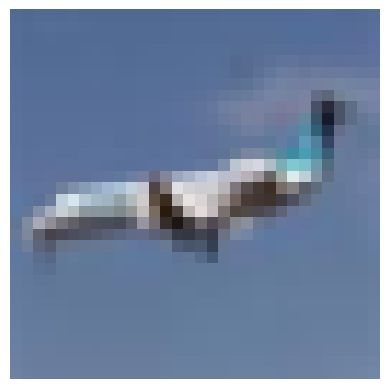

In [ ]:
# Display the reshaped and normalised image
image = x_train[10].reshape(img_width, img_height, 3)  # Assuming the first image is displayed
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

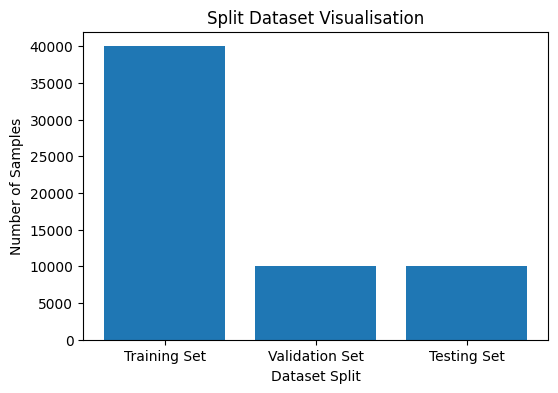

In [ ]:
# Calculate the sizes of each split
train_size = len(x_train)
val_size = len(x_val)
test_size = len(x_test)

#Display the training and Validation Set graph
# Plot the split dataset
plt.figure(figsize=(6, 4))
plt.bar(['Training Set', 'Validation Set', 'Testing Set'], [train_size, val_size, test_size])
plt.xlabel('Dataset Split')
plt.ylabel('Number of Samples')
plt.title('Split Dataset Visualisation')
plt.show()

In [ ]:
y_test_1 = np.argmax(y_test, axis=1)
y_train_1 = np.argmax(y_train, axis=1)
y_val_1 = np.argmax(y_val, axis=1)

In [ ]:
# Count the occurrences of each digit in the training set
train_digit_counts = np.bincount(y_train_1)

# Count the occurrences of each digit in the testing set
test_digit_counts = np.bincount(y_test_1)

# Count the occurrences of each digit in the validation set
val_digit_counts = np.bincount(y_val_1)

# Calculate the subtotal by adding the counts from the training, validation and testing sets
subtotal_digit_counts = train_digit_counts + val_digit_counts + test_digit_counts

# Calculate the total counts by summing the subtotal counts
total_digit_counts = np.sum(subtotal_digit_counts)

# Generate x-axis labels for each digit
digits = np.arange(10)

# Create a table
table = []
for digit, train_count, val_count, test_count, subtotal_count in zip(
    digits, train_digit_counts, val_digit_counts, test_digit_counts, subtotal_digit_counts
):
    table.append([digit, train_count, val_count, test_count, subtotal_count])

# Append a row for the subtotal
table.append(["Subtotal", np.sum(train_digit_counts), np.sum(val_digit_counts), np.sum(test_digit_counts), np.sum(subtotal_digit_counts)])

# Append a row for the total
table.append(["Total", "", "", total_digit_counts])

# Define the table headers
headers = ["Digit", "Training Set", "Validation Set", "Testing Set", "Subtotal"]

# Print the table
print(tabulate(table, headers, tablefmt="fancy_grid"))

╒══════════╤════════════════╤══════════════════╤═══════════════╤════════════╕
│ Digit    │ Training Set   │ Validation Set   │   Testing Set │   Subtotal │
╞══════════╪════════════════╪══════════════════╪═══════════════╪════════════╡
│ 0        │ 4027           │ 973              │          1000 │       6000 │
├──────────┼────────────────┼──────────────────┼───────────────┼────────────┤
│ 1        │ 4021           │ 979              │          1000 │       6000 │
├──────────┼────────────────┼──────────────────┼───────────────┼────────────┤
│ 2        │ 3970           │ 1030             │          1000 │       6000 │
├──────────┼────────────────┼──────────────────┼───────────────┼────────────┤
│ 3        │ 3977           │ 1023             │          1000 │       6000 │
├──────────┼────────────────┼──────────────────┼───────────────┼────────────┤
│ 4        │ 4067           │ 933              │          1000 │       6000 │
├──────────┼────────────────┼──────────────────┼───────────────┼

In [ ]:
# Load the pre-trained VGG16 model with modified top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

In [ ]:
# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Create a custom classification head
x = base_model.output
x = Flatten()(x)
x = Dense(800, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)  # 10 classes in CIFAR-10

In [ ]:
# Combine the base model and custom classification head
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

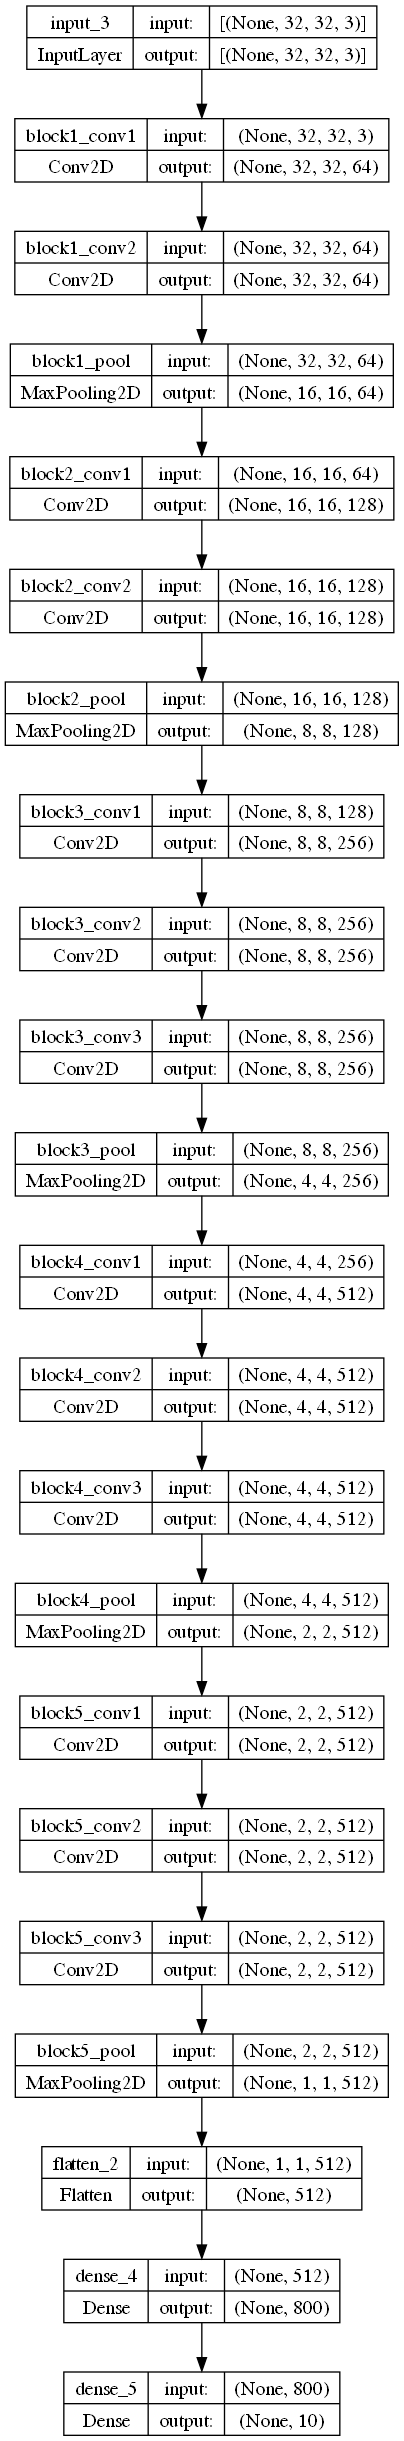

In [ ]:
# Visualize the model architecture
plot_model(model, show_shapes=True, show_layer_names=True, expand_nested=True)

In [ ]:
# Training the model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val),epochs=10, batch_size=32)

Epoch 1/10
1250/1250 [==============================] - 174s 138ms/step - loss: 1.3490 - accuracy: 0.5274 - val_loss: 1.2351 - val_accuracy: 0.5660
Epoch 2/10
1250/1250 [==============================] - 180s 144ms/step - loss: 1.1650 - accuracy: 0.5913 - val_loss: 1.1541 - val_accuracy: 0.5947
Epoch 3/10
1250/1250 [==============================] - 174s 139ms/step - loss: 1.0869 - accuracy: 0.6160 - val_loss: 1.1407 - val_accuracy: 0.5974
Epoch 4/10
1250/1250 [==============================] - 171s 137ms/step - loss: 1.0245 - accuracy: 0.6410 - val_loss: 1.1026 - val_accuracy: 0.6143
Epoch 5/10
1250/1250 [==============================] - 160s 128ms/step - loss: 0.9660 - accuracy: 0.6620 - val_loss: 1.1337 - val_accuracy: 0.6090
Epoch 6/10
1250/1250 [==============================] - 166s 133ms/step - loss: 0.9147 - accuracy: 0.6775 - val_loss: 1.1074 - val_accuracy: 0.6251
Epoch 7/10
1250/1250 [==============================] - 162s 130ms/step - loss: 0.8622 - accuracy: 0.6989 - val_

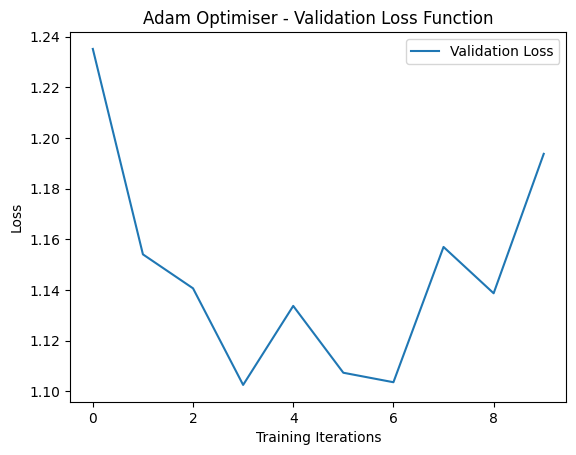

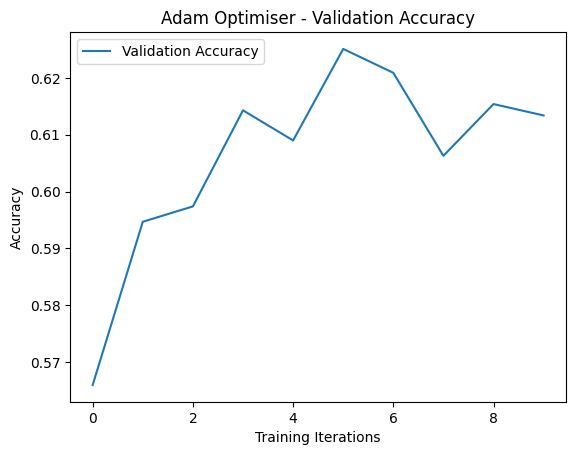

Final Validation Loss: 1.1937204599380493
Final Validation Accuracy: 0.6133999824523926
Final Training Loss: 0.7466750144958496


In [ ]:
# Get the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']
train_accuracy = history.history['accuracy']

# Get the final validation loss and accuracy values
final_train_loss = train_loss[-1]
final_val_loss = val_loss[-1]
final_val_accuracy = val_accuracy[-1]
final_train_accuracy = train_accuracy[-1]

# Create an array of training iteration numbers
iterations = np.arange(len(train_loss))

# Plot the loss function
plt.plot(iterations, val_loss, label='Validation Loss')
plt.xlabel('Training Iterations')
plt.ylabel('Loss')
plt.title('Adam Optimiser - Validation Loss Function')
plt.legend()
plt.show()

# Plot the accuracy
plt.plot(iterations, val_accuracy, label='Validation Accuracy')
plt.xlabel('Training Iterations')
plt.ylabel('Accuracy')
plt.title('Adam Optimiser - Validation Accuracy')
plt.legend()
plt.show()

# Print the final validation loss and accuracy
print("Final Validation Loss:", final_val_loss)
print("Final Validation Accuracy:", final_val_accuracy)
print("Final Training Loss:", final_train_accuracy)


In [ ]:
##y_test = to_categorical(y_test, 10)

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}')

313/313 [==============================] - 30s 97ms/step - loss: 1.2035 - accuracy: 0.6069
Test loss: 1.2035, Test accuracy: 0.6069


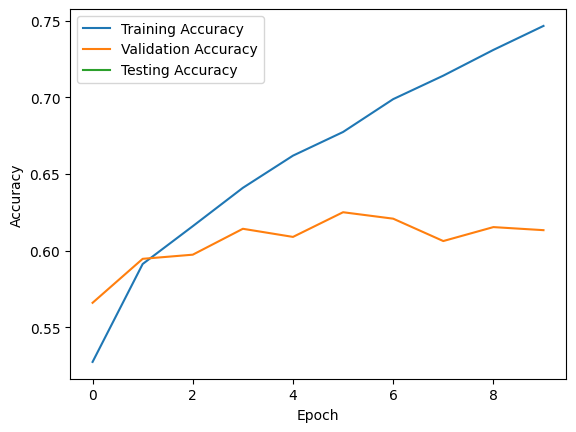

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(accuracy, label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Make predictions on the test set
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_test = np.argmax(y_test, axis=1)

313/313 [==============================] - 30s 94ms/step


In [ ]:
# Define a dictionary to map class labels to their names
class_labels = {
    0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat',
    4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse',
    8: 'ship', 9: 'truck'
}

In [ ]:
# Convert the dictionary to a list of lists for tabulation
table_data = [[class_name, class_index] for class_index, class_name in class_labels.items()]

# Create a table using tabulate with HTML format
table = tabulate(table_data, headers=['Class Name', 'Class Indices'], tablefmt='html')

# Display the HTML table within the code cell
HTML(table)

Class Name,Class Indices
airplane,0
automobile,1
bird,2
cat,3
deer,4
dog,5
frog,6
horse,7
ship,8
truck,9


[9883 4178   86 8920 8337 6551  198 9943 3454 3091]


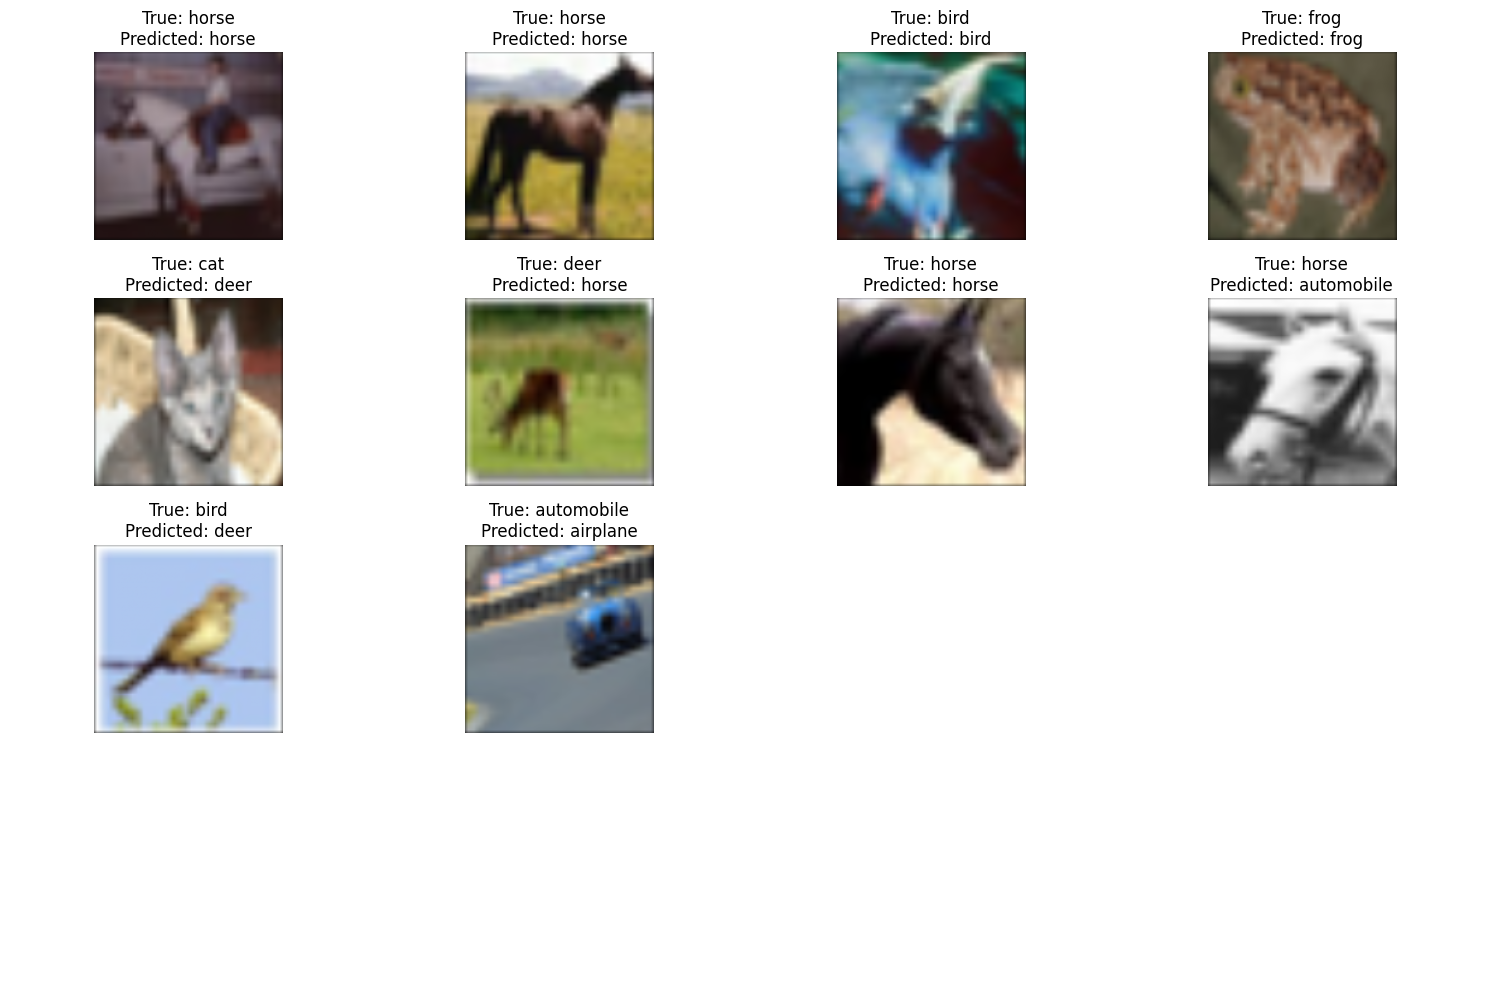

In [ ]:
num_examples_to_display = 10  # Number of examples to display
random_indices = np.random.choice(len(x_test), size=num_examples_to_display, replace=False)
print(random_indices)

# Display a grid of examples with their true and predicted labels
num_rows = 4  # Number of rows in the grid
num_cols = 4  # Number of columns in the grid

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))  # Adjust figsize as needed

for i, ax in enumerate(axes.flat):
    if i < num_examples_to_display:
        idx = random_indices[i]

        # Get the true class label and predicted class label
        true_class_label = class_labels[y_test[idx]]
        predicted_class_label = class_labels[y_pred[idx]]

        # Resize the image to 150x150 for visualization using skimage
        resized_image = resize(x_test[idx], (150, 150), mode='constant', anti_aliasing=False)

        # Display the original image without resizing
        ax.imshow(resized_image, cmap='gray')  # Assuming images are grayscale
        ax.set_title(f"True: {true_class_label}\nPredicted: {predicted_class_label}")
        ax.axis('off')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
print(y_test.shape)
print(y_pred.shape)

(10000,)
(10000,)


In [ ]:


# Calculate precision, recall, and F1 score
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Display
print("Loss", loss)
print("Accurancy", accuracy)
print()
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Loss 1.203548789024353
Accurancy 0.6069

Accuracy: 0.6069
Precision: 0.6168404721707006
Recall: 0.6069
F1 Score: 0.6017935581731614


In [ ]:
# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True, zero_division=1)
report_rows = [[label] + list(values.values()) for label, values in report.items() if label not in ['accuracy', 'macro avg', 'weighted avg']]
headers = ['Class', 'Precision', 'Recall', 'F1-Score', 'Support']

# Print the results
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
print("")

print("Convolutional Neuronal Network Report:")
print(tabulate(report_rows, headers=headers, tablefmt='orgtbl'))


Test Loss: 1.203548789024353
Test Accuracy: 0.6069

Convolutional Neuronal Network Report:
|   Class |   Precision |   Recall |   F1-Score |   Support |
|---------+-------------+----------+------------+-----------|
|       0 |    0.681733 |    0.724 |   0.702231 |      1000 |
|       1 |    0.665076 |    0.697 |   0.680664 |      1000 |
|       2 |    0.632686 |    0.391 |   0.483313 |      1000 |
|       3 |    0.53429  |    0.335 |   0.411801 |      1000 |
|       4 |    0.441953 |    0.67  |   0.532591 |      1000 |
|       5 |    0.562236 |    0.533 |   0.547228 |      1000 |
|       6 |    0.547346 |    0.763 |   0.637427 |      1000 |
|       7 |    0.692896 |    0.634 |   0.662141 |      1000 |
|       8 |    0.715111 |    0.743 |   0.728789 |      1000 |
|       9 |    0.695078 |    0.579 |   0.631751 |      1000 |


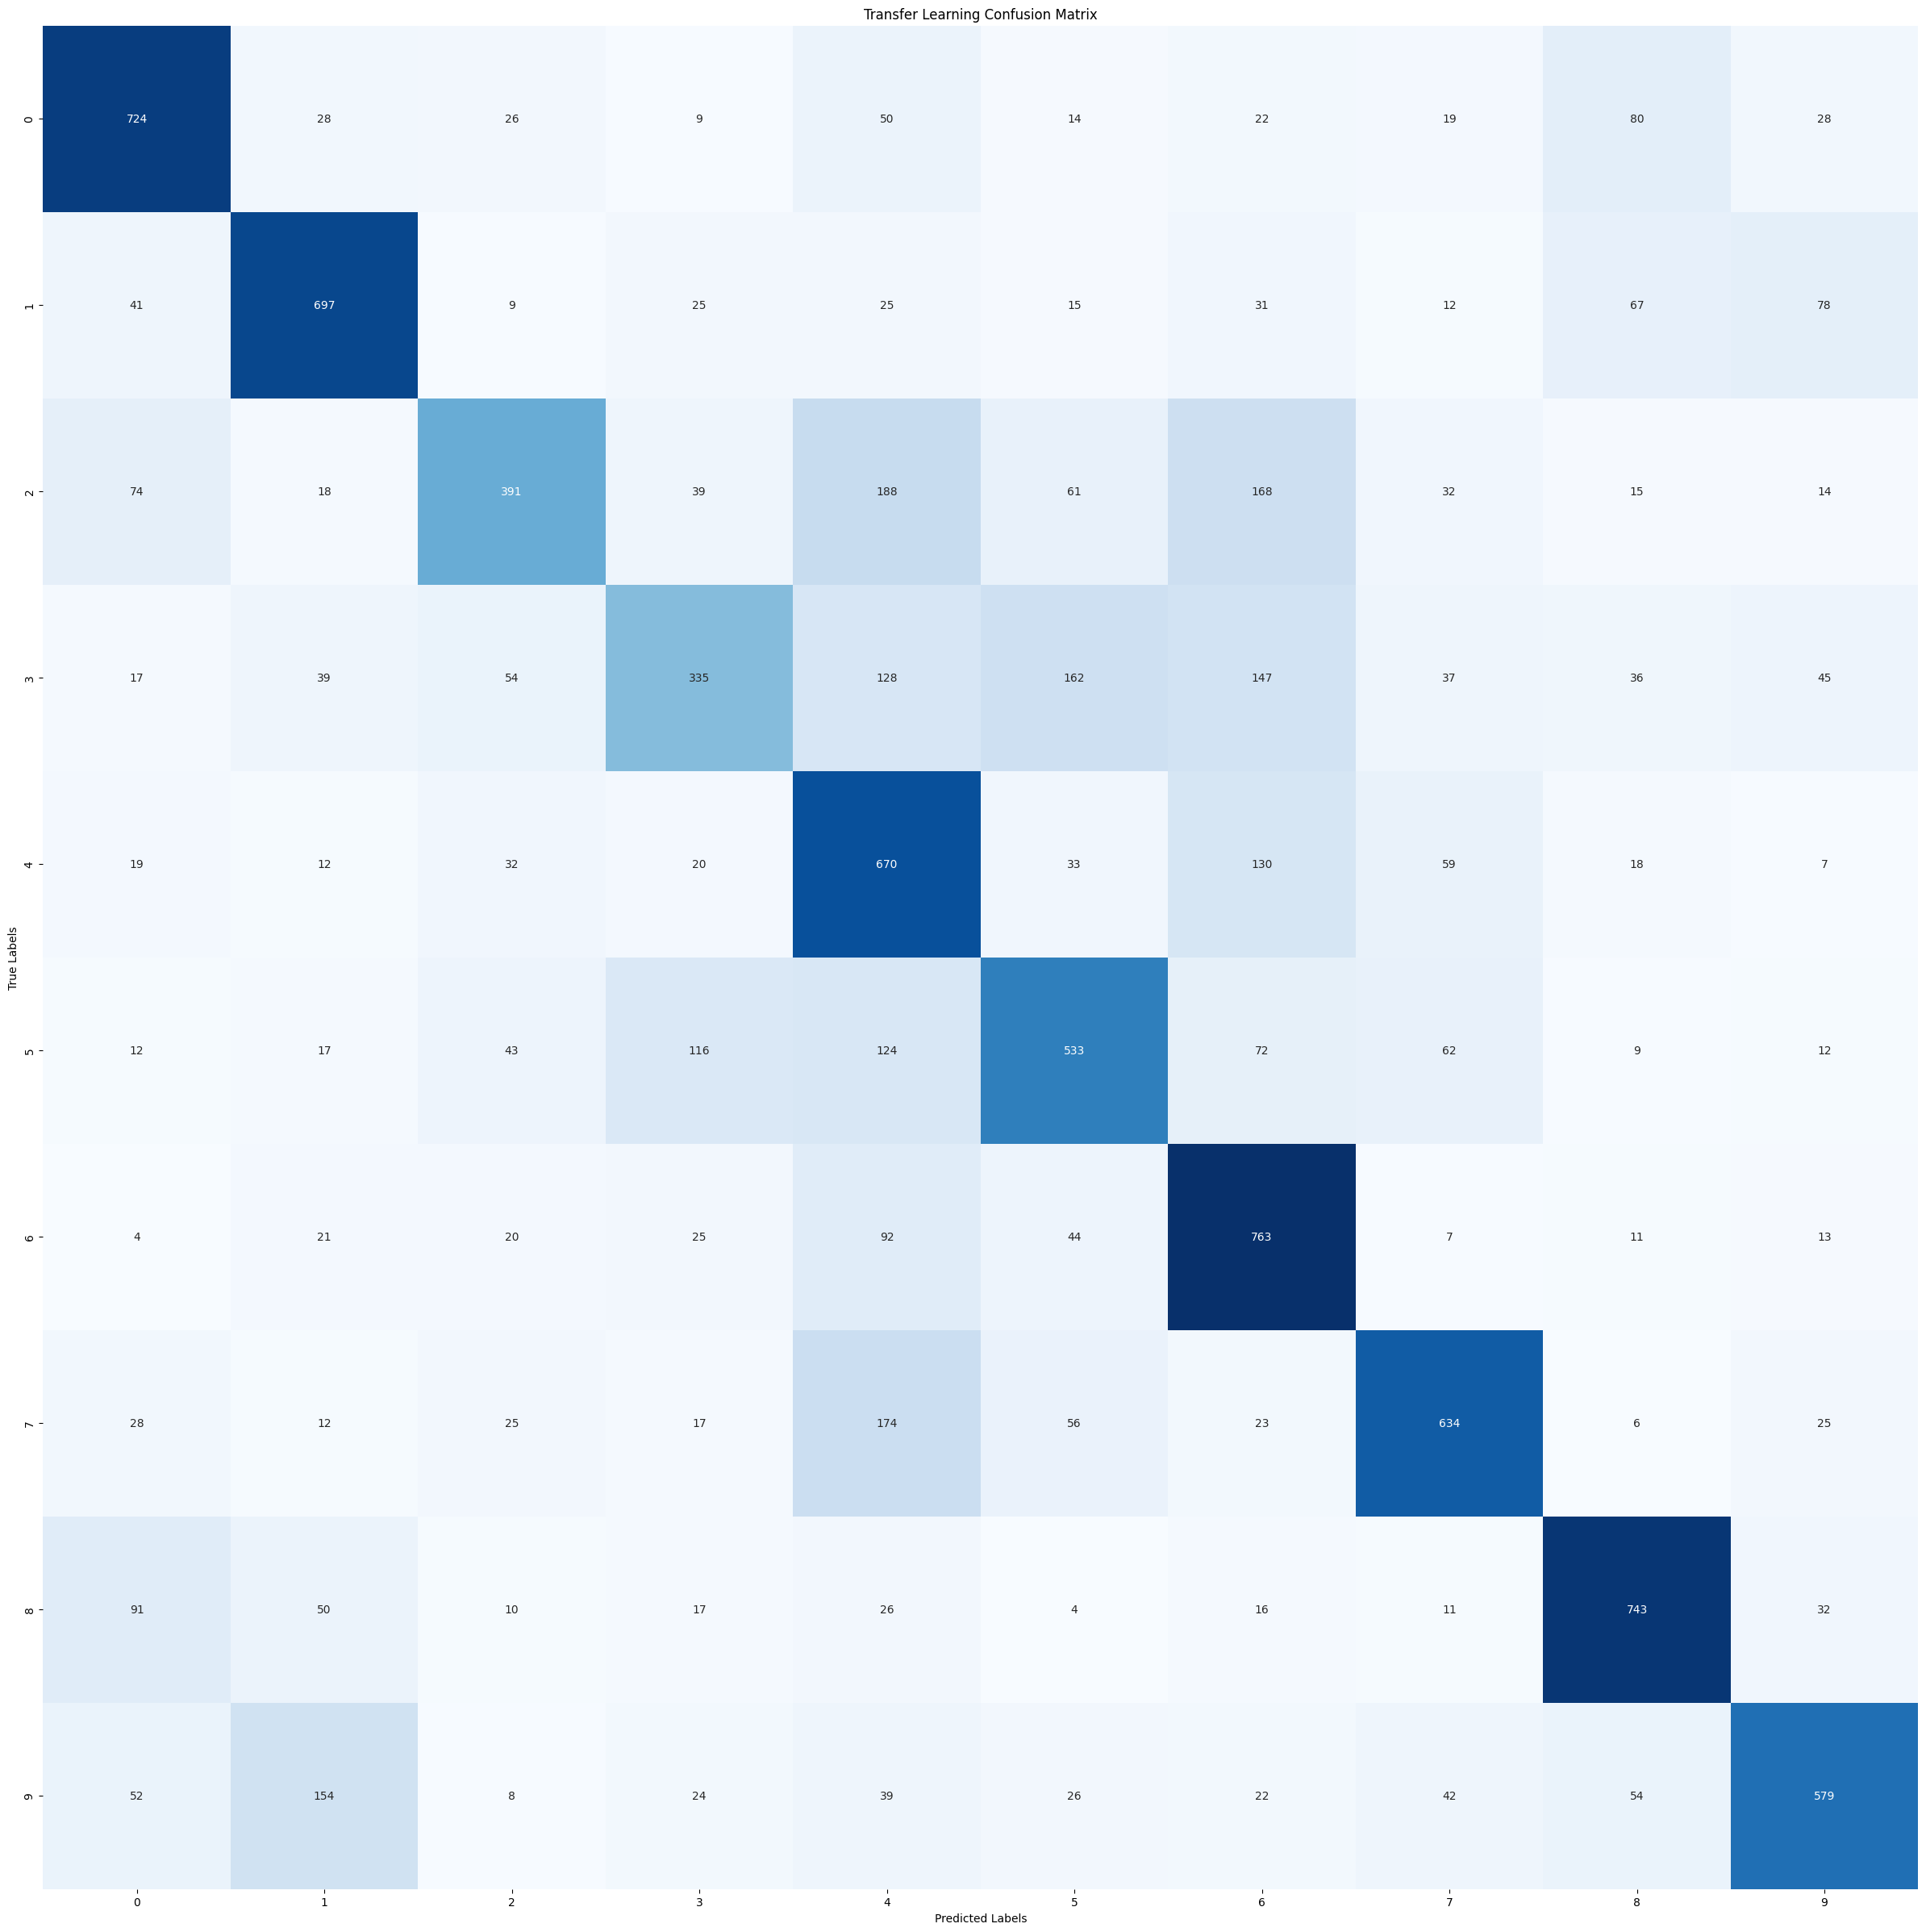

In [ ]:
# Calculate confusion matrix
dnn_cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(30, 30))
sns.heatmap(dnn_cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Transfer Learning Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()